## Categorization of the picture with PCA and clustering

In [68]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls ../data-preparation/data

data161917112020.pkl  data171917112020.pkl  data-64.pkl  data.pkl


In [3]:
with open('../data-preparation/data/data171917112020.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
img = cv2.cvtColor(data['images'][0], cv2.COLOR_BGR2GRAY)

In [9]:
img.shape

(64, 64)

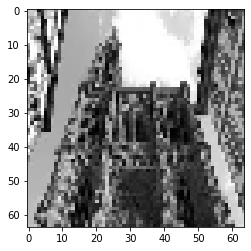

In [19]:
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
img_2 = data['images'][0]

In [26]:
img_2.shape

(64, 64, 3)

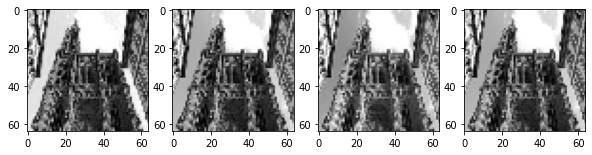

In [30]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)

plt.imshow(img_2[:, :, 0], cmap='gray')

plt.subplot(1, 4, 2)

plt.imshow(img_2[:, :, 1], cmap='gray')

plt.subplot(1, 4, 3)

plt.imshow(img_2[:, :, 2], cmap='gray')

plt.subplot(1, 4, 4)

plt.imshow(img, cmap='gray')

plt.show()

In [33]:
X = data['images'][:, :, :, 0].reshape(data['images'].shape[0], data['images'].shape[1] * data['images'].shape[2])

In [35]:
X.shape

(738, 4096)

In [36]:
X

array([[197, 203, 191, ..., 231, 248, 241],
       [251, 252, 251, ...,  10,  70,  23],
       [190, 188, 189, ...,   9, 106,   2],
       ...,
       [255, 255, 255, ..., 177, 169, 176],
       [255, 255, 255, ..., 140, 149, 144],
       [255, 254, 255, ...,  69,  66,  67]], dtype=uint8)

In [ ]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(738, 543)

In [48]:
from sklearn.cluster import KMeans

In [99]:
kmeans =  KMeans(n_clusters=3, random_state=0)

kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

In [100]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [101]:
data['y'][kmeans.labels_ == 0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [102]:
data['y'][kmeans.labels_ == 1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

In [103]:
data['y'][kmeans.labels_ == 2]

array([ 5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 11, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [104]:
data['cluster'] = kmeans.labels_

In [105]:
data.keys()

dict_keys(['images', 'target_names', 'target_name_for_answer', 'y', 'cluster'])

In [106]:
with open('../data-preparation/data/data171917112020.pkl', 'wb') as f:
    pickle.dump(data, f)